# TOPIC : Heart Failure prediction 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
data=pd.read_csv('F:\heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [15]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [16]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [17]:
heart=data.rename(columns = {'DEATH_EVENT':'Target'})

In [18]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Target
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [19]:
heart.shape


(299, 13)

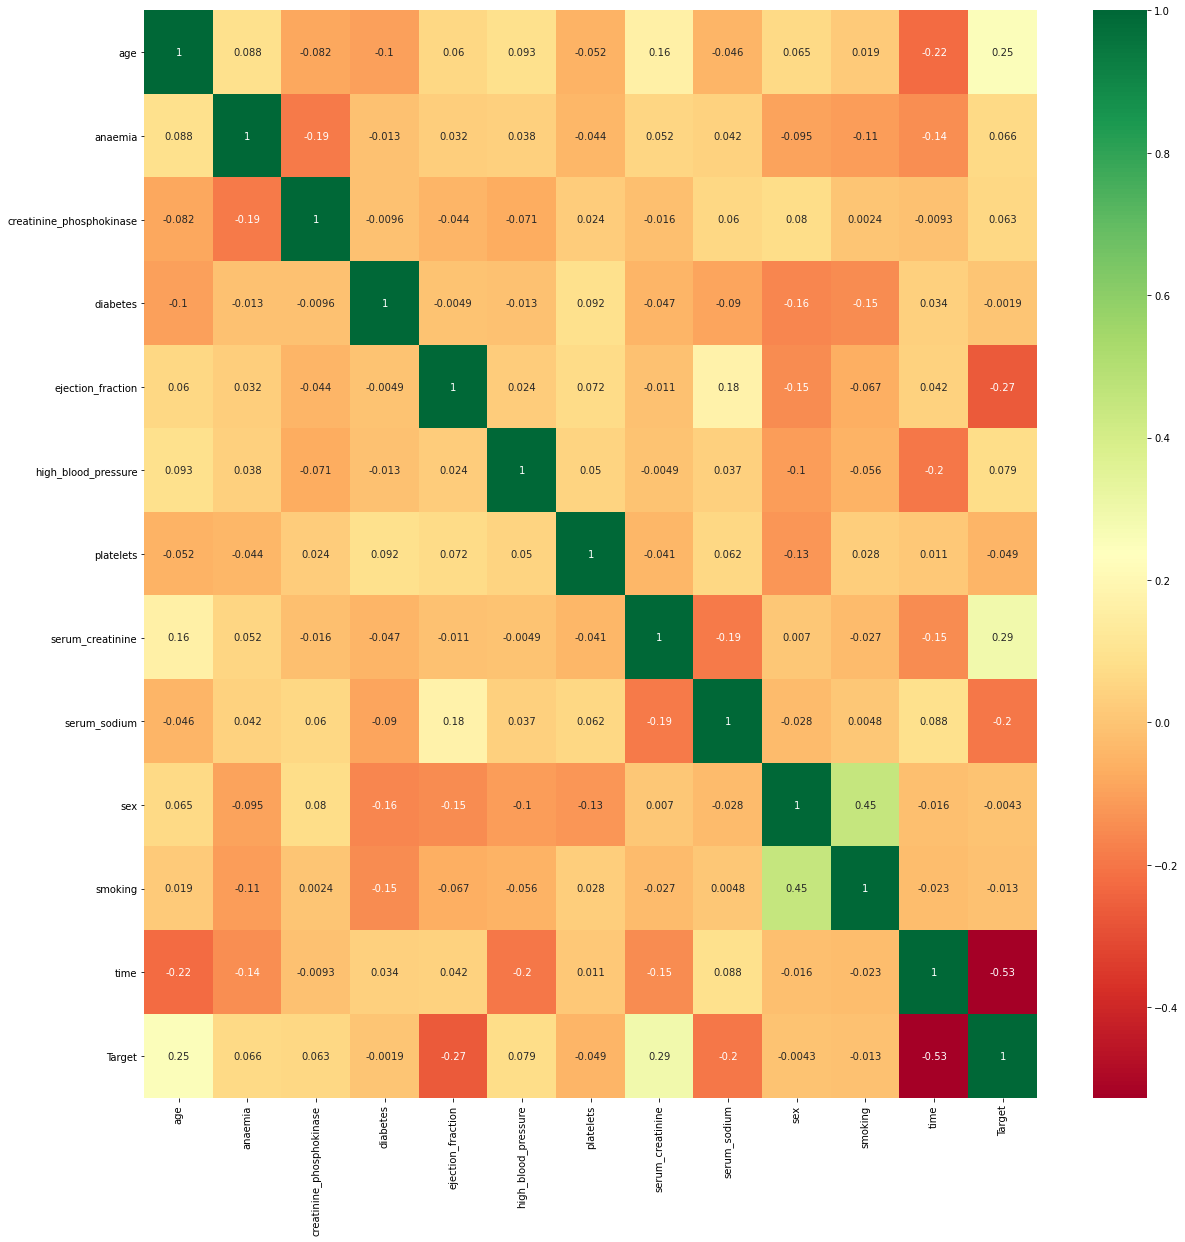

In [20]:
import seaborn as sns
corrmat=heart.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(heart[top_corr_features].corr(),annot=True,cmap='RdYlGn')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

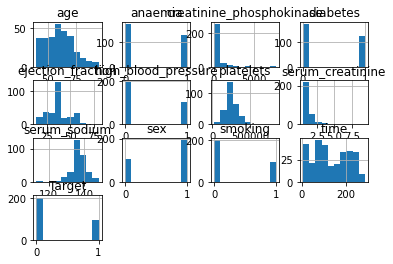

In [21]:
 heart.hist()

<AxesSubplot:xlabel='Target', ylabel='count'>

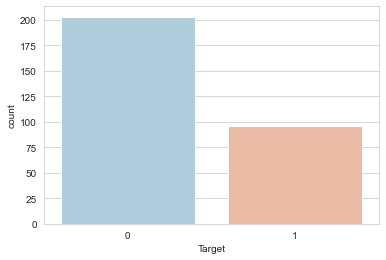

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=heart,palette='RdBu_r')

data processing


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [26]:
x=heart[['age','ejection_fraction','serum_creatinine','serum_sodium','time']]
y=heart['Target']


In [28]:
x1=x
y1=y

In [29]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3,random_state=16)
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((209, 5), (90, 5), (209,), (90,))

In [32]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):
 knn_classifier=KNeighborsClassifier(n_neighbors = k)
 score=cross_val_score(knn_classifier,x,y,cv=10)
 knn_scores.append(score.mean())


Text(0.5, 1.0, 'K Neighbors Classifier score for different k values')

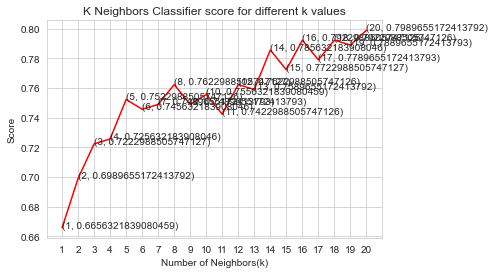

In [33]:
plt.plot([k for k in range(1,21)],knn_scores,color='red')
for i in range (1,21):
 plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Score')
plt.title('K Neighbors Classifier score for different k values')

In [34]:
knn_classifier=KNeighborsClassifier(n_neighbors = 16)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [35]:
knn_accuracy=score.mean()*100

In [36]:
knn_accuracy


79.22988505747126

 Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn import metrics as sm

In [39]:
x2=x
y2=y

In [40]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3,random_state=42)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape


((209, 5), (90, 5), (209,), (90,))

In [41]:
logR=LogisticRegression(max_iter = 500).fit(x2_train,y2_train)
logR

LogisticRegression(max_iter=500)

In [42]:
logR.predict_proba(x2_test)


array([[9.43089617e-01, 5.69103832e-02],
       [9.93518225e-01, 6.48177490e-03],
       [9.05303317e-01, 9.46966828e-02],
       [1.08528459e-04, 9.99891472e-01],
       [8.71977309e-01, 1.28022691e-01],
       [9.91387698e-01, 8.61230176e-03],
       [3.29755341e-01, 6.70244659e-01],
       [8.47217649e-01, 1.52782351e-01],
       [3.17773583e-02, 9.68222642e-01],
       [8.64932306e-01, 1.35067694e-01],
       [8.74646020e-01, 1.25353980e-01],
       [9.20336061e-01, 7.96639393e-02],
       [8.67200355e-01, 1.32799645e-01],
       [8.00601756e-01, 1.99398244e-01],
       [6.99966378e-01, 3.00033622e-01],
       [6.06936604e-01, 3.93063396e-01],
       [9.54273442e-01, 4.57265576e-02],
       [6.47639285e-01, 3.52360715e-01],
       [8.20348838e-01, 1.79651162e-01],
       [5.42620714e-01, 4.57379286e-01],
       [5.98861869e-01, 4.01138131e-01],
       [7.67116276e-01, 2.32883724e-01],
       [8.05931086e-01, 1.94068914e-01],
       [3.12582051e-01, 6.87417949e-01],
       [4.375094

In [43]:
logR.predict_proba(x2_test).shape



(90, 2)

In [44]:
print(logR.intercept_)

[6.78008279]


In [45]:
print(logR.coef_)


[[ 0.05633004 -0.0743512   0.82202255 -0.0530869  -0.02222585]]


In [46]:
pred=logR.predict(x2_test)
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [47]:
df1 = pd.DataFrame({'actual': y2_test, 'predictions': pred})
df1.head(10)


,actual,predictions
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,1
109,0,0
5,1,1
173,0,0


In [48]:
ct = pd.crosstab(df1['actual'], df1['predictions'])
ct

predictions,0,1
actual,,
0,49,4
1,15,22


In [49]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y2_test,pred)

array([[49,  4],
       [15, 22]], dtype=int64)

In [51]:
LogR_accuracy=(sm.accuracy_score(y2_test,pred))*100
LogR_accuracy


78.88888888888889

In [52]:
table=pd.DataFrame({'knn accuracy':[knn_accuracy], 'Logistic Regression':[LogR_accuracy]})

In [53]:
table

,knn accuracy,Logistic Regression
0,79.229885,78.888889


submitted by MAYUR MAROTI CHANDEKAR